<a href="https://colab.research.google.com/github/Kynea0b/demo-nlp/blob/main/test/8-emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境構築

In [2]:
# huggingface transformer のインストール
# - transformers : 主たるモジュール（モデルやトークナイザのダウンロード)
# - datasets : HuggingFaceで、データセットを扱うためのモジュール
# https://huggingface.co/docs/transformers/installation
! pip install transformers
! pip install datasets==v2.11.0

# 東北大学の日本語用BERT使用に必要なパッケージをインストール
! pip install fugashi ipadic

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.0/698.0 kB 32.9 MB/s eta 0:00:00
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=3bf560d3bc1d6a2aa2e0cf64f07fa02cbd4ad868cf59a5981502ebe6038821e1
  Stored in directory: /root/.cache/pip/wheels/44/56/37/f543963822b85260c9f948df8fac8c20169c80dc71b24dc407
Successfully built ipadic


In [3]:
!ls /root/.cache/matplotlib

fontlist-v390.json


In [4]:
# [前準備] Matplotlib で日本語フォントを使用できるようにする
# cf. https://blog.3qe.us/entry/2018/08/16/121457
!apt-get -y install fonts-ipafont-gothic
#!rm /root/.cache/matplotlib/fontlist-v310.json
#!rm /root/.cache/matplotlib/fontlist-v300.json
!rm /root/.cache/matplotlib/fontlist-v390.json
!pip install japanize-matplotlib
!pip install unidic_lite
# NOTE ここで、ランタイムを再起動

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 21 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (7,952 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

### 日本語表示できるかテスト

Text(0.5, 1.0, '日本語を表示できるかテスト')

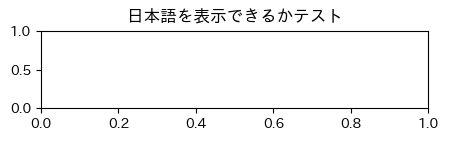

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# sns.set_theme(font='IPAexGothic')
# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

### Huggingface moduleのインストール

In [6]:
# huggingface transformer のインストール
# - transformers : 主たるモジュール（モデルやトークナイザのダウンロード)
# - datasets : HuggingFaceで、データセットを扱うためのモジュール
# https://huggingface.co/docs/transformers/installation
! pip install transformers
! pip install datasets==v2.11.0

## Huggingface ログイン

In [10]:
import os
HF_TOKEN = os.environ.get("HF_TOKEN")
from huggingface_hub import login

login(token=HF_TOKEN)

## モデルロード

In [9]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd
import numpy as np

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

In [15]:
model_name = "kynea0b/cl-tohoku-bert-base-japanese-v3-wrime-8-emotions"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/231k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

## 推論実行

#### ラベル作成

In [11]:
# Plutchikの8つの基本感情
emotion_names = ['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear', 'Disgust', 'Trust']
emotion_names_jp = ['喜び', '悲しみ', '期待', '驚き', '怒り', '恐れ', '嫌悪', '信頼']  # 日本語版
num_labels = len(emotion_names)

#### 推論

In [18]:
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=False, ret_prob=False):
    # 推論モードを有効か
    model.eval()

    # 入力データ変換 + 推論
    tokens = tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    out_dict = {n: p for n, p in zip(emotion_names_jp, prob)}

    # 棒グラフを描画
    if show_fig:
        plt.figure(figsize=(8, 3))
        df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        sns.barplot(x='name', y='prob', data=df)
        plt.title('入力文 : ' + text[:25], fontsize=15)

    if ret_prob:
        return out_dict

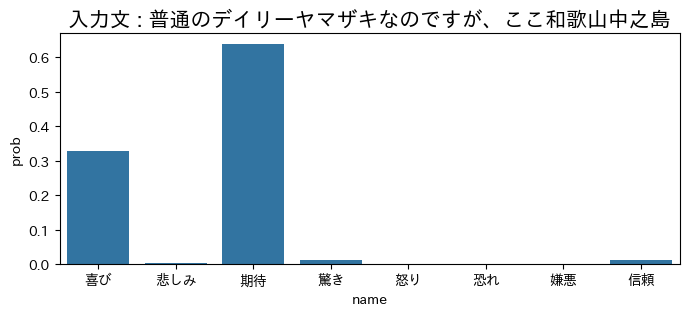

In [21]:
analyze_emotion('普通のデイリーヤマザキなのですが、ここ和歌山中之島店は、程近くに地蔵の辻と言う場所があります。辻。。つまり交差点にお地蔵様が見守っておられます(現在は道路拡張工事の為にお地蔵様は少し移設)。その地蔵の辻にちなんだお地蔵様あんぱんがここ中之島店限定で販売されております。つぶあんと、そしてホイップクリームをサンドしたオリジナルあんぱんは美味しさ満点！お地蔵様と言う事で縁起物としてプレゼントされる方も多いそうですよ( ´▽｀)普通のコンビニとは少し違う、このオリジナルあんぱんを是非食べて下さいね♪', show_fig=True)
